## Titanic
#### As told by the data.


In [1]:
#Lets import everything we're going to need for this
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline
np.random.seed(45831)

#Read in titanic dataset
t_df = pd.read_csv('datasets/titanic.csv')

hist_bins = 50

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x109643400>]], dtype=object)

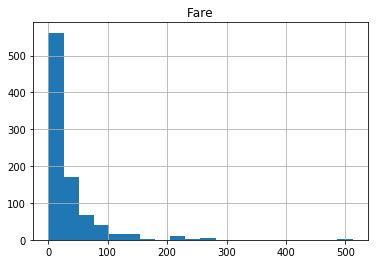

In [2]:
t_df.hist(column="Fare", bins=20)

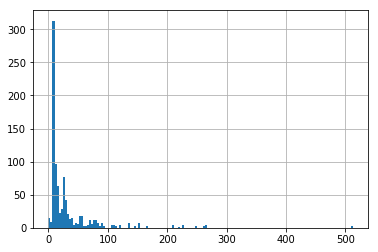

In [3]:
t_df["Fare"].hist(bins=150)

In [4]:
t_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [5]:
t_df[(t_df["Fare"] < 0.01)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,15.000000,15.000000,15.000000,7.000000,15.0,15.0,15.0
mean,516.400000,0.066667,1.933333,35.142857,0.0,0.0,0.0
std,225.808958,0.258199,0.798809,10.023781,0.0,0.0,0.0
min,180.000000,0.000000,1.000000,19.000000,0.0,0.0,0.0
25%,290.500000,0.000000,1.000000,30.500000,0.0,0.0,0.0
50%,482.000000,0.000000,2.000000,38.000000,0.0,0.0,0.0
75%,704.000000,0.000000,2.500000,39.500000,0.0,0.0,0.0
max,823.000000,1.000000,3.000000,49.000000,0.0,0.0,0.0


In [6]:
t_df[(t_df["Fare"] < 0.01) & ( t_df["Survived"] )].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,272.0,1.0,3.0,25.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,272.0,1.0,3.0,25.0,0.0,0.0,0.0
25%,272.0,1.0,3.0,25.0,0.0,0.0,0.0
50%,272.0,1.0,3.0,25.0,0.0,0.0,0.0
75%,272.0,1.0,3.0,25.0,0.0,0.0,0.0
max,272.0,1.0,3.0,25.0,0.0,0.0,0.0


In [7]:
#Passengers that survived and didn't pay for a ticket
t_df[(t_df["Fare"] < 0.01) & ( t_df["Survived"] )]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b50d048>]], dtype=object)

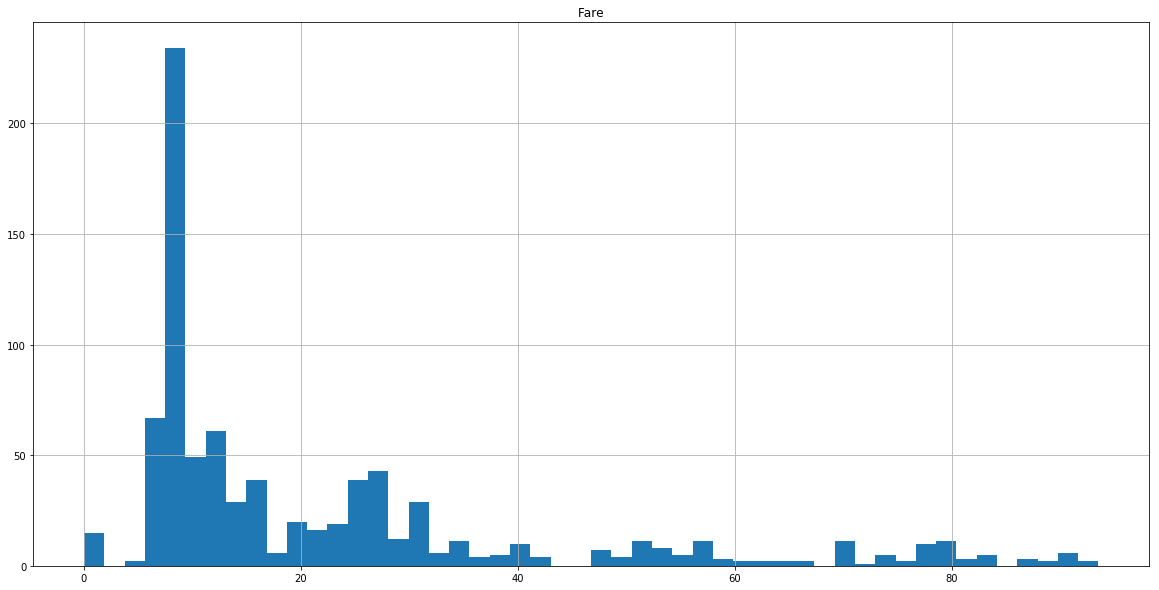

In [8]:
t_df[(t_df["Fare"]<100)].hist(column="Fare", bins=50,figsize=(20,10))

In [9]:
#passengers that paid more than 150
t_df[(t_df["Fare"] > 150)].describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,29.000000,29.000000,29.0,27.000000,29.000000,29.000000,29.000000
mean,472.862069,0.689655,1.0,30.478519,0.655172,1.103448,240.775579
std,230.677376,0.470824,0.0,14.873135,1.009804,1.012240,102.640802
min,28.000000,0.000000,1.0,0.920000,0.000000,0.000000,151.550000
25%,306.000000,0.000000,1.0,21.500000,0.000000,0.000000,164.866700
50%,439.000000,1.000000,1.0,29.000000,0.000000,1.000000,227.525000
75%,701.000000,1.000000,1.0,39.000000,1.000000,2.000000,262.375000
max,857.000000,1.000000,1.0,64.000000,3.000000,4.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b67d390>]], dtype=object)

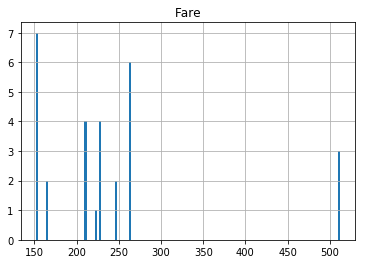

In [10]:
t_df[(t_df["Fare"] > 150)].hist(column="Fare", bins=150)

In [11]:
#All Fares grouped by dollar
tot_gp = t_df["Fare"].round(0)
tot_ct = Counter(tot_gp)


In [12]:
#get Fares of those that survived grouped by dollar
survived_fare = t_df.loc[t_df.Survived == 1, "Fare"].round(0)
grp_fare = Counter(survived_fare)


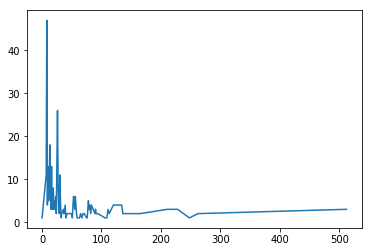

In [13]:
surv_list = sorted(dict(grp_fare).items())
x,y = zip(*surv_list)
plt.plot(x, y)

<Container object of 90 artists>

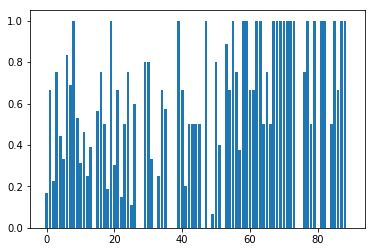

In [14]:
#Find Survival Rate based on ticket price
fare_mortality = dict()
survived = dict(grp_fare)

for key in dict(tot_ct):
    #fare_mortality[key] = surv_list[key] / value
    if key in survived:
        #print(survived[key]/tot_ct[key])
        fare_mortality[key] = survived[key]/tot_ct[key]
    else:
        #print(0)
        fare_mortality[key] = 0.0
#bar Chart
plt.bar(range(len(fare_mortality)), fare_mortality.values(), align="center")



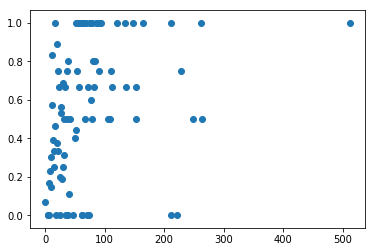

In [15]:
x = fare_mortality.keys()
y = fare_mortality.values()
plt.scatter(x,y)